In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
df = pd.read_csv('../Khammam.csv')
print(df.shape)
df

(84, 4)


,Date,PM10,NOx,SO2
0,01-01-2016,77.0,22.0,8.0
1,01-02-2016,71.0,20.0,8.0
2,01-03-2016,61.0,20.7,7.4
3,01-04-2016,63.0,21.0,8.0
4,01-05-2016,60.0,19.0,7.0
...,...,...,...,...
79,01-08-2022,68.0,41.6,6.7
80,01-09-2022,54.0,36.3,7.0
81,01-10-2022,57.0,39.3,7.8
82,01-11-2022,93.0,28.5,6.3


In [ ]:
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15))

69   2021-01-10
70   2021-01-11
71   2021-01-12
72   2022-01-01
73   2022-01-02
74   2022-01-03
75   2022-01-04
76   2022-01-05
77   2022-01-06
78   2022-01-07
79   2022-01-08
80   2022-01-09
81   2022-01-10
82   2022-01-11
83   2022-01-12
Name: Date, dtype: datetime64[ns]


In [ ]:
cols = list(df)[1:4]
print(cols)

['PM10', 'NOx', 'SO2']


<AxesSubplot:>

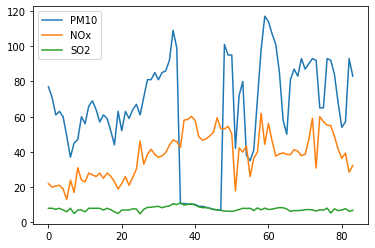

In [ ]:
df_for_training = df[cols].astype(float)
df_for_training.plot()

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training

,PM10,NOx,SO2
0,77.0,22.0,8.0
1,71.0,20.0,8.0
2,61.0,20.7,7.4
3,63.0,21.0,8.0
4,60.0,19.0,7.0
...,...,...,...
79,68.0,41.6,6.7
80,54.0,36.3,7.0
81,57.0,39.3,7.8
82,93.0,28.5,6.3


In [ ]:
n_future = 12
n_past = 3

In [ ]:
trainX = []
trainYP = []
trainYN = []
trainYS = []

In [ ]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainYP.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
    trainYN.append(df_for_training_scaled[i + n_future - 1:i + n_future, 1])
    trainYS.append(df_for_training_scaled[i + n_future - 1:i + n_future, 2])

In [ ]:
trainX, trainYP, trainYN, trainYS = np.array(trainX), np.array(trainYP), np.array(trainYN), np.array(trainYS)
print('trainX shape == {}.'.format(trainX.shape))
print('trainYP shape == {}.'.format(trainYP.shape))
print('trainYN shape == {}.'.format(trainYN.shape))
print('trainYS shape == {}.'.format(trainYS.shape))

trainX shape == (70, 3, 3).
trainYP shape == (70, 1).
trainYN shape == (70, 1).
trainYS shape == (70, 1).


In [ ]:
modelP = Sequential()
modelP.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelP.add(LSTM(32, activation='relu', return_sequences=False))
modelP.add(Dropout(0.2))
modelP.add(Dense(trainYP.shape[1]))

In [ ]:
modelP.compile(optimizer='adam', loss='mse')
modelP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = modelP.fit(trainX, trainYP, epochs=200, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/200
4/4 [==============================] - 7s 130ms/step - loss: 1.2444 - val_loss: 0.4396
Epoch 2/200
4/4 [==============================] - 0s 23ms/step - loss: 1.2289 - val_loss: 0.4403
Epoch 3/200
4/4 [==============================] - 0s 22ms/step - loss: 1.2195 - val_loss: 0.4421
Epoch 4/200
4/4 [==============================] - 0s 24ms/step - loss: 1.2190 - val_loss: 0.4416
Epoch 5/200
4/4 [==============================] - 0s 27ms/step - loss: 1.2050 - val_loss: 0.4414
Epoch 6/200
4/4 [==============================] - 0s 40ms/step - loss: 1.1907 - val_loss: 0.4426
Epoch 7/200
4/4 [==============================] - 0s 41ms/step - loss: 1.1914 - val_loss: 0.4413
Epoch 8/200
4/4 [==============================] - 0s 44ms/step - loss: 1.1664 - val_loss: 0.4414
Epoch 9/200
4/4 [==============================] - 0s 55ms/step - loss: 1.1707 - val_loss: 0.4431
Epoch 10/200
4/4 [==============================] - 0s 44ms/step - loss: 1.1552 - val_loss: 0.4419
Epoch 11/200
4/4 [

In [ ]:
historyP = history

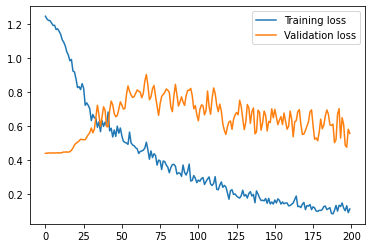

In [ ]:
plt.plot(historyP.history['loss'], label='Training loss')
plt.plot(historyP.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predict_period_dates = pd.date_range(start = '01-01-2023',periods=12, freq='M').tolist()
print(predict_period_dates)

[Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M'), Timestamp('2023-12-31 00:00:00', freq='M')]


In [ ]:
predictionP = modelP.predict(trainX[:12])

1/1 [==============================] - 0s 282ms/step


In [ ]:
prediction_copiesP = np.repeat(predictionP, df_for_training.shape[1], axis=-1)
y_pred_futureP = scaler.inverse_transform(prediction_copiesP)[:,0]

In [ ]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

In [ ]:
df_forecastP = pd.DataFrame({'Date':np.array(forecast_dates), 'PM10':y_pred_futureP})
df_forecastP['Date']=pd.to_datetime(df_forecastP['Date'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='PM10'>

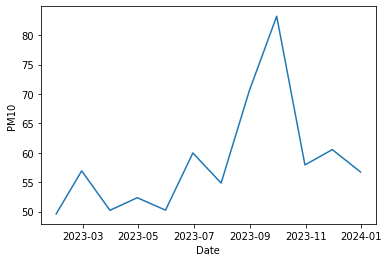

In [ ]:
sns.lineplot(df_forecastP['Date'], df_forecastP['PM10'])

In [ ]:
df_forecastP

,Date,PM10
0,2023-01-31,49.592941
1,2023-02-28,56.920250
2,2023-03-31,50.206993
3,2023-04-30,52.350586
4,2023-05-31,50.230194
5,2023-06-30,59.961208
6,2023-07-31,54.840485
7,2023-08-31,70.569206
8,2023-09-30,83.222488
9,2023-10-31,57.924549


In [ ]:
modelN = Sequential()
modelN.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelN.add(LSTM(32, activation='relu', return_sequences=False))
modelN.add(Dropout(0.2))
modelN.add(Dense(trainYN.shape[1]))

In [ ]:
modelN.compile(optimizer='adam', loss='mse')
modelN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyN = modelN.fit(trainX, trainYN, epochs=200, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/200
4/4 [==============================] - 3s 192ms/step - loss: 0.9000 - val_loss: 0.4756
Epoch 2/200
4/4 [==============================] - 0s 25ms/step - loss: 0.8763 - val_loss: 0.4747
Epoch 3/200
4/4 [==============================] - 0s 24ms/step - loss: 0.8584 - val_loss: 0.4725
Epoch 4/200
4/4 [==============================] - 0s 24ms/step - loss: 0.8481 - val_loss: 0.4700
Epoch 5/200
4/4 [==============================] - 0s 29ms/step - loss: 0.8241 - val_loss: 0.4673
Epoch 6/200
4/4 [==============================] - 0s 24ms/step - loss: 0.8067 - val_loss: 0.4654
Epoch 7/200
4/4 [==============================] - 0s 32ms/step - loss: 0.7821 - val_loss: 0.4654
Epoch 8/200
4/4 [==============================] - 0s 22ms/step - loss: 0.7516 - val_loss: 0.4666
Epoch 9/200
4/4 [==============================] - 0s 22ms/step - loss: 0.7223 - val_loss: 0.4696
Epoch 10/200
4/4 [==============================] - 0s 25ms/step - loss: 0.7112 - val_loss: 0.4759
Epoch 11/200
4/4 [

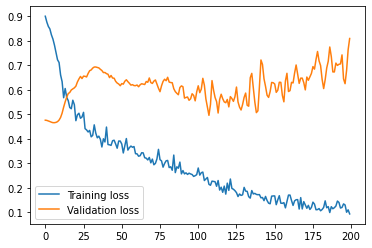

In [ ]:
plt.plot(historyN.history['loss'], label='Training loss')
plt.plot(historyN.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionN = modelN.predict(trainX[:12])

1/1 [==============================] - 0s 260ms/step


In [ ]:
prediction_copiesN = np.repeat(predictionN, df_for_training.shape[1], axis=-1)
y_pred_futureN = scaler.inverse_transform(prediction_copiesN)[:,1]

In [ ]:
df_forecastN = pd.DataFrame({'Date':np.array(forecast_dates), 'NOx':y_pred_futureN})
df_forecastN['Date']=pd.to_datetime(df_forecastN['Date'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='NOx'>

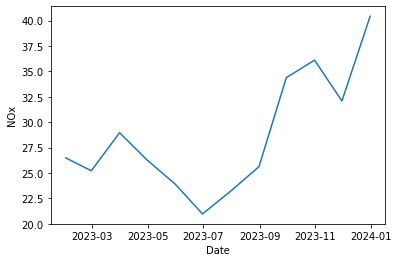

In [ ]:
sns.lineplot(df_forecastN['Date'], df_forecastN['NOx'])

In [ ]:
df_forecastN

,Date,NOx
0,2023-01-31,26.475374
1,2023-02-28,25.208668
2,2023-03-31,28.954832
3,2023-04-30,26.285927
4,2023-05-31,23.899569
5,2023-06-30,20.961021
6,2023-07-31,23.210361
7,2023-08-31,25.617153
8,2023-09-30,34.379749
9,2023-10-31,36.104141


In [ ]:
modelS = Sequential()
modelS.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelS.add(LSTM(32, activation='relu', return_sequences=False))
modelS.add(Dropout(0.2))
modelS.add(Dense(trainYS.shape[1]))

In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyS = modelS.fit(trainX, trainYS, epochs=200, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/200
4/4 [==============================] - 3s 136ms/step - loss: 1.0782 - val_loss: 0.8460
Epoch 2/200
4/4 [==============================] - 0s 25ms/step - loss: 1.0714 - val_loss: 0.8611
Epoch 3/200
4/4 [==============================] - 0s 30ms/step - loss: 1.0562 - val_loss: 0.8746
Epoch 4/200
4/4 [==============================] - 0s 29ms/step - loss: 1.0562 - val_loss: 0.8781
Epoch 5/200
4/4 [==============================] - 0s 28ms/step - loss: 1.0463 - val_loss: 0.8892
Epoch 6/200
4/4 [==============================] - 0s 28ms/step - loss: 1.0417 - val_loss: 0.8968
Epoch 7/200
4/4 [==============================] - 0s 49ms/step - loss: 1.0197 - val_loss: 0.9078
Epoch 8/200
4/4 [==============================] - 0s 42ms/step - loss: 1.0201 - val_loss: 0.9243
Epoch 9/200
4/4 [==============================] - 0s 49ms/step - loss: 1.0050 - val_loss: 0.9392
Epoch 10/200
4/4 [==============================] - 0s 48ms/step - loss: 1.0011 - val_loss: 0.9556
Epoch 11/200
4/4 [

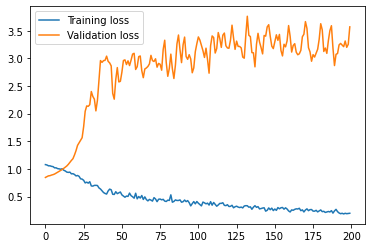

In [ ]:
plt.plot(historyS.history['loss'], label='Training loss')
plt.plot(historyS.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionS = modelS.predict(trainX[:12])

1/1 [==============================] - 0s 496ms/step


In [ ]:
prediction_copiesS = np.repeat(predictionS, df_for_training.shape[1], axis=-1)
y_pred_futureS = scaler.inverse_transform(prediction_copiesS)[:,2]

In [ ]:
df_forecastS = pd.DataFrame({'Date':np.array(forecast_dates), 'SO2':y_pred_futureS})
df_forecastS['Date']=pd.to_datetime(df_forecastS['Date'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='SO2'>

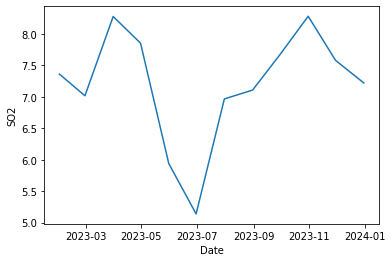

In [ ]:
sns.lineplot(df_forecastS['Date'], df_forecastS['SO2'])

In [ ]:
df_forecastS

,Date,SO2
0,2023-01-31,7.361353
1,2023-02-28,7.017441
2,2023-03-31,8.278098
3,2023-04-30,7.854732
4,2023-05-31,5.939585
5,2023-06-30,5.138043
6,2023-07-31,6.967090
7,2023-08-31,7.108234
8,2023-09-30,7.671492
9,2023-10-31,8.282416


In [ ]:
frames = [df_forecastP, df_forecastN[['NOx']], df_forecastS[['SO2']]]

In [ ]:
result = pd.concat([df_forecastP, df_forecastN[['NOx']], df_forecastS[['SO2']]], axis=1)

In [ ]:
result

,Date,PM10,NOx,SO2
0,2023-01-31,49.592941,26.475374,7.361353
1,2023-02-28,56.920250,25.208668,7.017441
2,2023-03-31,50.206993,28.954832,8.278098
3,2023-04-30,52.350586,26.285927,7.854732
4,2023-05-31,50.230194,23.899569,5.939585
5,2023-06-30,59.961208,20.961021,5.138043
6,2023-07-31,54.840485,23.210361,6.967090
7,2023-08-31,70.569206,25.617153,7.108234
8,2023-09-30,83.222488,34.379749,7.671492
9,2023-10-31,57.924549,36.104141,8.282416


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/LSTM KHAMMAM AQI.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  result.to_csv(f)

Mounted at /content/drive
